# Pandas Exploration Project
   

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
# place your code into this Code cell
df = pd.read_csv("Data Science Jobs Salaries.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### Show five rows, selected at random, from the dataset

In [4]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
206,2021e,SE,FT,Data Engineer,65000,EUR,77481,RO,50,GB,S
6,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
147,2021e,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
114,2021e,EN,FT,Machine Learning Engineer,85000,USD,85000,NL,100,DE,S
116,2021e,SE,CT,Staff Data Scientist,105000,USD,105000,US,100,US,M


### Column Names and their data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


### Unique Features of Dataset
My dataset contains data on different people's data science related jobs and their salary. 

I will give a brief description of what each column means below. In the dataset, abbreviations are used, so I will explain what they mean below as well. 
#### work_year
The year which the salary was paid.
Possible values are: 
- 2020: year with a definitve amount from the past
- 2021e: estimated amount for 2021

#### experience_level
The experience level of the job. 
Possible values are: 
- EN: Entry level
- MI: Mid-level 
- SE: Senior-level
- EX: Executive-level

#### employment_type
The type of employemnt of this persons job. 
- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance

#### job_title
The job title of the role the person worked in. 

#### salary 
The total gross salary paid. 

#### salary_currency
Currency the salary was paid in. 

#### salary_in_usd
The salary converted to USD. 

#### employee_residence
Employee's country of residence while working this job. 

#### remote_ratio
The overall ratio of work done remotely while working this job. 
Possible values are: 
- 0: No remote work 
- 50: Partially remote
- 100: Fully remote

#### company_location
Country the company is located in. 

#### company_size
The size of the company. 
Possible values are:
- S: Small, less than 50 employees
- M: Medium, 50 to 250 employees
- L: Large, more than 250 employees

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

My data set does not require much munging, as can be seen from the above in the Data Inspection section, there are no non-null and missing values in this data set. However, I will still make changes to the data set to cater more to my data analysis. 

The below code cell, drops columns that I think are repetitive and uncessary for my data analysis. I dropeed the columns named "salary" and "salary_currency", as I will be using the column "salar_in_usd" to make comparisons of each record's salary. 

In [6]:
df= df.drop(['salary', 'salary_currency', ], axis=1)

The below code cell, changes values in the column "experience_level" to a numerical value between 0 and 3. 
- 0 = EN (Entry Level)
- 1 = MI (Mid Level)
- 2 = SE (Senior Level)
- 3 = EX (Executive Level)

The higher the numerical value, the greater the experience level. This will make it easier to interpret and understand what the value means, as abbreviations can be confusing. 

In [8]:
df["experience_level"].replace({"EN": "0", "MI": "1", "SE": "2", "EX": "3"}, inplace=True)


For consistency, I will replace the value 2021e to 2021 in the column named "work_year". 

In [9]:
df["work_year"].replace({"2021e": "2021"}, inplace=True)

Displays 5 random rows from the dataset to show the changes made to the dataset. 

In [10]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
83,2021,0,FT,Data Scientist,36952,FR,50,FR,L
119,2021,1,FT,Data Engineer,30337,TR,100,TR,M
197,2020,0,FT,Data Scientist,62726,DE,50,DE,S
16,2021,1,FT,Data Engineer,90000,US,100,US,L
105,2021,1,PT,Data Engineer,70329,NL,100,NL,L


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### Analaysis #1: Median of all data science jobs salary in usd

In [11]:
df["salary_in_usd"].median()

81000.0

#### Analaysis #2: Count the number of data science jobs at each experience level

In [12]:
df["experience_level"].value_counts()

1    103
2     77
0     54
3     11
Name: experience_level, dtype: int64

#### Analaysis #3: Show 5 records of Entry Level Jobs with a salary over $50,000

In [14]:
df[(df["experience_level"]=="0") & (df["salary_in_usd"]>= 50000)].head(5)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,0,FT,Data Science Consultant,64369,DE,50,DE,L
4,2021,0,FT,Machine Learning Engineer,125000,US,100,US,S
17,2021,0,FT,Data Analyst,90000,US,100,US,S
18,2021,0,FT,Data Analyst,60000,US,100,US,S
28,2021,0,FT,Research Scientist,83000,GB,50,GB,L


#### Analaysis #4: Calculate the mean salary of each experience level

In [15]:
df.groupby("experience_level")["salary_in_usd"].mean()

experience_level
0     59753.462963
1     85738.135922
2    128841.298701
3    226288.000000
Name: salary_in_usd, dtype: float64

#### Analaysis #5: Show top 10 job titles with the highest mean salary 

In [16]:
df.groupby("job_title")["salary_in_usd"].mean().sort_values().tail(10)[::-1]

job_title
Financial Data Analyst                450000.000000
Applied Machine Learning Scientist    423000.000000
Principal Data Engineer               392500.000000
Head of Data                          232500.000000
Principal Data Scientist              225097.800000
Director of Data Science              197751.500000
ML Engineer                           180655.333333
Machine Learning Scientist            180500.000000
Data Architect                        180000.000000
Principal Data Analyst                170000.000000
Name: salary_in_usd, dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### Visual #1: Bar Chart of Job Title and their average salary in USD

<AxesSubplot:ylabel='Job Title'>

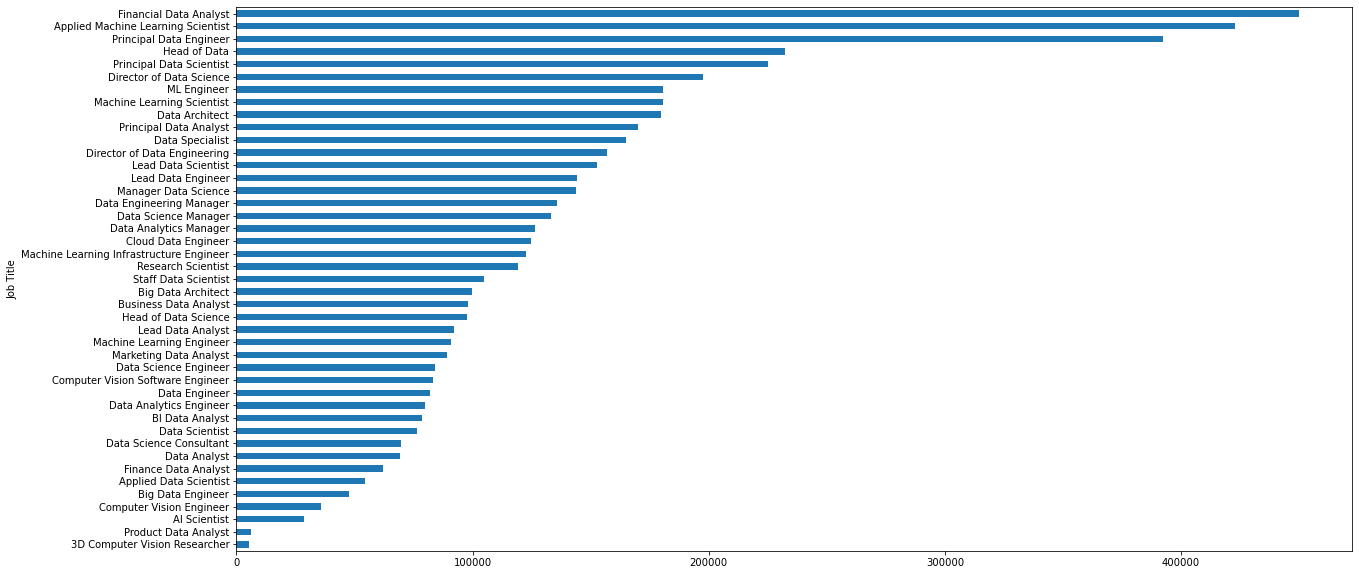

In [17]:
df_to_plot = df[['job_title','salary_in_usd']].groupby(by=['job_title']).aggregate({'mean'})
df_to_plot = df_to_plot.sort_values(("salary_in_usd", "mean"))
df_to_plot.plot.barh(xlabel='Job Title', ylabel='Average Salary', legend =False, figsize = (20,10))

#### Visual #2: Pie Chart showing number of people with jobs of different employment types

<AxesSubplot:ylabel='employment_type'>

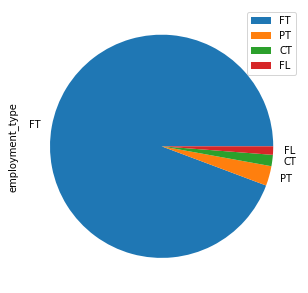

In [19]:
g= df["employment_type"].value_counts()
g.plot.pie(y="Number of Jobs", legend=True, figsize=(5,10))

#### Visual #3: Line Plot of average salary at different experience level

<AxesSubplot:xlabel='Experience Level', ylabel='Average Salary'>

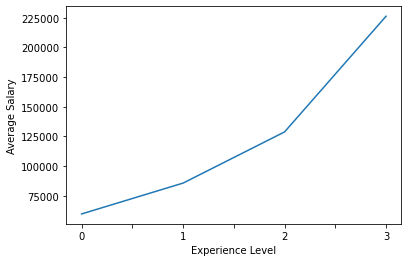

In [20]:
ea = df[['experience_level','salary_in_usd']].groupby(by=['experience_level']).aggregate({'mean'})
ea.plot(xlabel='Experience Level', ylabel='Average Salary', legend =False)

#### Visual #4: Pie Chart showing number of companies operating at different remote ratios

<AxesSubplot:ylabel='remote_ratio'>

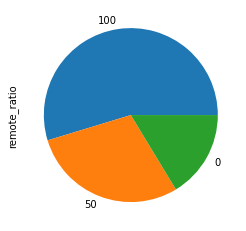

In [21]:
h= df["remote_ratio"].value_counts()
h.plot.pie(y="# of companies", legend=False)

#### Visual #5: Bar Chart showing the number of people who reside where their comapny is located

Create new column in dataframe named "near_comapny", which will check whether the employee lives near the company. It stores a boolean value from the comparison between the column "employee_residence" and "company_location". 

In [22]:
df["near_company"] = df["employee_residence"]== df["company_location"]

Display 5 random rows of data from dataset after addition of new column "near_company". 

In [23]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,near_company
204,2021,2,FT,Finance Data Analyst,62250,GB,50,GB,L,True
129,2021,0,FT,Big Data Engineer,16271,IN,100,IN,L,True
81,2021,2,FT,Data Engineer,96833,GB,50,GB,L,True
45,2021,0,FT,Data Science Consultant,77481,DE,100,DE,S,True
235,2021,2,FT,Director of Data Science,168000,JP,0,JP,S,True


Create the bar chart plot. 

<AxesSubplot:xlabel='Lives near company', ylabel='Number of People'>

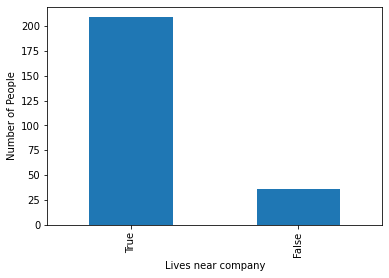

In [24]:
live_near = df["near_company"].value_counts()
live_near.plot.bar(xlabel='Lives near company', ylabel='Number of People', legend =False)
